## 변수선택

회귀분석을 할 때 다중공선성이 발생하면, 데이터 분석의 신뢰성이나 예측 정확도를 떨어뜨린다.  
이러한 문제를 해결하기 위한 방법 중 하나로 데이터 선정/전처리 과정에서 "변수선택"이 중요하다.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 불러오기

corolla = pd.read_csv("./Data/ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [2]:
# 데이터 수와 변수의 수 확인하기

nCar = corolla.shape[0]
nVar = corolla.shape[1]

# 1436-row , 37-col
print(nCar,nVar)                  

corolla.info()

1436 37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Gu

info()를 확인해보면 Model, Fuel_Type이 object 타입인 것을 알 수 있다. 하지만, Model은 자동차 모델이기 때문에 각각의 행마다 다르므로 이를 수정할 필요는 없다.

In [3]:
corolla["Fuel_Type"].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [4]:
pd.get_dummies(corolla["Fuel_Type"])

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [5]:
Fuel = pd.get_dummies(corolla["Fuel_Type"])
Fuel

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [6]:
corolla_ = corolla.drop(["Id","Model","Fuel_Type"], axis = 1, inplace = False)
mlr_data = pd.concat((corolla_,Fuel), axis=1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [7]:
# bias를 위한 상수항 추가

mlr_data = sm.add_constant(mlr_data, has_constant = "add")
mlr_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,CNG,Diesel,Petrol
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,0,0,1
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,0,0,1
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,0,0,1
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,0,0,1


In [8]:
feature_columns = mlr_data.columns.difference(["Price"]) # Target column 빼기

X = mlr_data[feature_columns]
y = mlr_data.Price

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state=42)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [9]:
# train & 회귀모델 적합

full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     296.6
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:59:20   Log-Likelihood:                -8441.4
No. Observations:                1005   AIC:                         1.695e+04
Df Residuals:                     971   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -411.9163    138.476     -2.975      0.003    -683.664    -140.169
Age_08_04         -120.3279      4.148    -29.008      0.000    -128.468    -112.188
Airbag_1           252.2214    254.630      0.991      0.322    -247.466     751.909
Airbag_2            19.5419    141.981      0.138      0.891    -259.083     298.167
Airco              265.4324     93.722      2.832      0.005      81.511     449.354
Automatic          296.7430    157.001      1.890      0.059     -11.358     604.844
Automatic_airco   2276.9343    199.242     11.428      0.000    1885.940    2667.928
BOVAG_Guarantee    524.0424    132.865      3.944      0.000     263.307     784.778
Backseat_Divider  -308.1778    135.114     -2.281      0.023    -573.327     -43.029
Boardcomputer     -348.8057    127.105     -2.744      0.006    -598.237     -99.374
CD_Player          200.7190    105.066      1.910      0.056      -5.465     406.902
CNG               -916.8892    254.151     -3.608      0.000   -1415.637    -418.141
Central_Lock      -234.7721    155.967     -1.505      0.133    -540.843      71.299
Cylinders           -0.0386      0.002    -16.423      0.000      -0.043      -0.034
Diesel            -423.6983    208.844     -2.029      0.043    -833.535     -13.861
Doors               -1.8346     42.874     -0.043      0.966     -85.971      82.302
Gears               69.4784    195.803      0.355      0.723    -314.768     453.725
Guarantee_Period    65.4119     14.780      4.426      0.000      36.407      94.416
HP                  12.6665      3.797      3.336      0.001       5.216      20.117
KM                  -0.0152      0.001    -11.326      0.000      -0.018      -0.013
Met_Color           77.9358     79.111      0.985      0.325     -77.313     233.184
Metallic_Rim       199.1373    102.268      1.947      0.052      -1.554     399.829
Mfg_Month         -103.5461     10.601     -9.768      0.000    -124.350     -82.743
Mfg_Year            -0.6734      0.938     -0.718      0.473      -2.515       1.168
Mfr_Guarantee      165.8111     77.513      2.139      0.033      13.700     317.923
Mistlamps          -65.0692    113.769     -0.572      0.567    -288.331     158.193
Petrol            1340.5778    215.848      6.211      0.000     916.995    1764.161
Power_Steering      74.4389    292.311      0.255      0.799    -499.195     648.073
Powered_Windows    481.7900    156.660      3.075      0.002     174.359     789.221
Quarterly_Tax       13.5867      1.946      6.982      0.000       9.768      17.405
Radio              676.9629    795.878      0.851      0.395    -884.876    2238.802
Radio_cassette    -796.4053    796.961     -0.999      0.318   -2360.369     767.558
Sport_Model        229.9804     92.127      2.496      0.013      49.190     410.771
Tow_Bar           -202.

R^2를 보면 0.912로 매우 높은 편이다. 그리고 이렇게 변수가 많아질 수록 변수 하나하나에 대한 신뢰도는 떨어진다.  
VIF를 통해 다중공선성을 확인해보자.

In [10]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif["features"] = mlr_data.columns
vif

/Users/baek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/baek/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


위의 OLS와 VIF 검정을 모두 확인했을 때, p-value가 유의하고 VIF값이 매우 높아도 논리적으로 중요한 변수라고 생각하면 변수를 지우지 않고 살릴 필요가 있다.  
이러한 과정을 통해 중요하지 않은 변수 중에서, p-value가 높고 VIF 값이 높은 변수를 선택해서 제거해야한다.

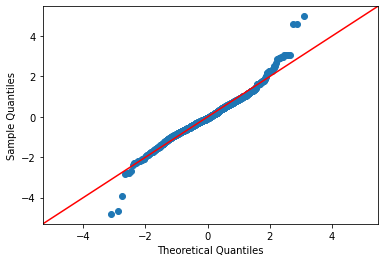

In [11]:
# 학습데이터의 잔차 확인

res = fitted_full_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

q-q plot은 잔차의 정규성을 확인할 때 쓰는 그래프 중 하나로, statsmodels.api 라이브러리 내에 존재한다.  
이 q-q plot은 y=x의 형태를 띄어야 정규성을 보이는 것이다. 위의 그래프를 보면 잔차가 완전한 정규성을 보이지 않는 것을 확인할 수 있다.  
하지만, 실제데이터는 잔차가 완전한 정규성을 띄는 것을 확인하기 힘들다.  
보통 위의 그래프처럼 실제에서도 꼬리 부분의 값들이 정규성을 띄지 않는 경우가 있다.  
그래도 위의 그래프는 꼬리부분 약간의 데이터를 제외하고 정규성을 띄고 있다고 판단할 수 있다.

Text(0, 0.5, 'Residual')

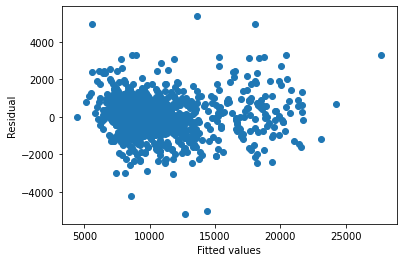

In [12]:
# 잔차패턴 확인

pred_y = fitted_full_model.predict(train_x)

import matplotlib.pyplot as plt 

plt.scatter(pred_y, train_y-pred_y, label = "data")
#plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

위 그래프는 모든 변수를 사용해 학습된 모델의 예측값과 잔차간의 상관관계를 확인하기 우해 나타낸 산점도이다.  
이를 보면 특별한 경향이 발견되지 않으므로 잔차가 균등하게 나왔다고 판단가능하다.

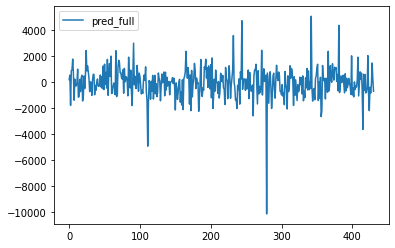

In [13]:
# 검증데이터에 대한 예측

pred_y2 = fitted_full_model.predict(test_x)

# 예측데이터 잔차

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()

위 그래프를 보면 한가지 경우를 제외하고 오차가 일정하다.

In [14]:
#MSE 구하기

from sklearn.metrics import mean_squared_error

mean_squared_error(test_y, pred_y2)

1370098.0629705563

이러한 과정으로 데이터를 확인하고 변수를 제거해야하는지 판단하는 작업이 사전에 필요하다.  
그리고 다중공선성/과적합 등 문제가 발생하면 변수를 가공하고, 범주형 변수는 가변수생성을 통해 추가적인 변수로 변환할 필요가 있다.  
이과정 후에 변수 선택법을 적용하여 변수를 선택하고 축소하는 과정이 이어진다.

## 변수선택
1. 전진선택법(Forward Selection)
2. 후진소거법(Backward Elimination)
3. 단계적선택법(Stepwise Selection)

### 0. 변수선택법(전체 경우의 수를 찾는 방법)

In [15]:
# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가된다.

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

# trian_x에 const 값을 미리 추가해 놓아야한다.    
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f936ef95dd0>, 'AIC': 19106.873807214186}


In [16]:
# 전체 변수의 AIC test

processSubset(X=train_x, y=train_y, feature_set = feature_columns) 

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7f936efa4790>,
 'AIC': 16950.74296727897}

In [17]:
import time
import itertools 

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const']),k) :
		# 각 변수 조합을 고려한 경우의수
        
        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성
        
        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장
        
        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함
	
    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")
    
    return best_model
    
print(getBest(X=train_x, y = train_y, k=2))

Processed 630 models on 2 predictors in 0.770421028137207 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                           17491.063264
Name: 211, dtype: object


위의 함수는 전체 변수의 가능한 조합을 모두 확인하는 함수이다.  
좋은 변수를 선택하여 모델을 만들 수 있겠지만, 변수의 총 수와 k가 증가할때마다 시간이 기하급수적으로 증가하는 문제가 생긴다.  
그렇기 떄문에 "변수를 선택하는 방법"을 선정해야 한다.

In [18]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
	models.loc[i] = getBest(X=train_x, y=train_y,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 36 models on 1 predictors in 0.06200098991394043 seconds.
Processed 630 models on 2 predictors in 0.7393770217895508 seconds.
Processed 7140 models on 3 predictors in 17.573107957839966 seconds.
Total elapsed time: 18.648174047470093 seconds.


In [19]:
# 선택된 변수의 개수(1,2,3)별 가장낮은 AIC를 보유한 모델들이 들어있는 DF

models

,AIC,model
1,17735.496885,<statsmodels.regression.linear_model.Regressio...
2,17491.063264,<statsmodels.regression.linear_model.Regressio...
3,17327.643642,<statsmodels.regression.linear_model.Regressio...


In [20]:
# 가장 AIC가 낮은 3번째 모델의 OLS결과를 출력

models.loc[3,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2060.
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:59:41   Log-Likelihood:                -8659.8
No. Observations:                1005   AIC:                         1.733e+04
Df Residuals:                    1001   BIC:                         1.735e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0235      0.001    -17.154      0.000      -0.026      -0.021
Mfg_Year    1476.5392     37.459     39.418      0.000    1403.032    1550.046
Weight        18.8171      0.995     18.910      0.000      16.864      20.770
const       -2.96e+06   7.44e+04    -39.797      0.000   -3.11e+06   -2.81e+06
==============================================================================
Omnibus:                      173.240   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.101
Skew:                          -0.480   Prob(JB):                         0.00
Kurtosis:                       9.169   Cond. No.                     1.39e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# 모든 변수를 모델링한 것과 비교

print("full model Rsquared:","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC:","{:.5f}".format(fitted_full_model.aic))
print("full model MSE:","{:.5f}".format(fitted_full_model.mse_total))

print("selected model Rsquared:","{:.5f}".format(models.loc[3,"model"].rsquared))
print("selected model AIC:","{:.5f}".format(models.loc[3,"model"].aic))
print("selected model MSE:","{:.5f}".format(models.loc[3,"model"].mse_total))


full model Rsquared: 0.90974
full model AIC: 16950.74297
full model MSE: 12825489.85398
selected model Rsquared: 0.86059
selected model AIC: 17327.64364
selected model MSE: 12825489.85398


### 1.전진선택법

In [22]:
train_x.shape

(1005, 37)

In [23]:
### 전진석택법(step=1)

def forward(X,y,predictors):
	
    # predictor - 현재 선택되어있는 변수
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors :
    	results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    #print(models)
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model["AIC"])
    return best_model
    
### 전진선택법 모델

def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])

In [24]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.13910794258117676
Selected predictors: ['Mfg_Year', 'const'] AIC:  17735.496885352477
Processed  35 models on 2 predictors in 0.07439732551574707
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  17491.063263913515
Processed  34 models on 3 predictors in 0.08592796325683594
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const'] AIC:  17376.823286299245
Processed  33 models on 4 predictors in 0.10479021072387695
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const'] AIC:  17165.885404969074
Processed  32 models on 5 predictors in 0.08084702491760254
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'const'] AIC:  17098.930957200086
Processed  31 models on 6 predictors in 0.11260509490966797
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'const'] AIC:  17067.62736254291
Processed  30 models on 7 predictors in 0.10302591323

변수를 계속 추가하며 AIC가 증가하는 경우가 생기면, 이전 모델을 선택하는 학습과정을 진행한다.

In [25]:
Forward_best_model.aic

16937.000376376123

In [26]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     427.0
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:59:43   Log-Likelihood:                -8444.5
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     981   BIC:                         1.705e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year            -1.0239      0.768     -1.334      0.183      -2.531       0.483
Automatic_airco   2228.7545    187.190     11.906      0.000    1861.416    2596.093
KM                  -0.0154      0.001    -11.583      0.000      -0.018      -0.013
Weight              15.1066      1.299     11.633      0.000      12.558      17.655
HP                  10.6171      3.352      3.168      0.002       4.040      17.194
Powered_Windows    463.4075    154.321      3.003      0.003     160.570     766.245
BOVAG_Guarantee    519.9689    131.298      3.960      0.000     262.311     777.627
Guarantee_Period    64.9824     14.509      4.479      0.000      36.510      93.455
Petrol            1902.2946    292.551      6.502      0.000    1328.198    2476.392
Quarterly_Tax       13.4812      1.867      7.222      0.000       9.818      17.144
Boardcomputer     -319.5038    124.655     -2.563      0.011    -564.125     -74.883
ABS               -401.3254    105.229     -3.814      0.000    -607.825    -194.826
Airco              264.1947     89.914      2.938      0.003      87.750     440.640
Sport_Model        253.5718     85.911      2.952      0.003      84.982     422.161
Tow_Bar           -205.2129     80.884     -2.537      0.011    -363.938     -46.488
CD_Player          234.1757    100.721      2.325      0.020      36.523     431.828
Mfr_Guarantee      180.7346     76.246      2.370      0.018      31.111     330.358
Backseat_Divider  -302.0491    125.187     -2.413      0.016    -547.714     -56.385
Metallic_Rim       193.9321     94.071      2.062      0.040       9.329     378.536
Automatic          248.6550    152.562      1.630      0.103     -50.731     548.041
Age_08_04         -119.1958      4.000    -29.800      0.000    -127.045    -111.346
Airbag_1           340.0180    212.496      1.600      0.110     -76.981     757.017
Central_Lock      -231.6094    152.794     -1.516      0.130    -531.449      68.230
Mfg_Month         -103.3365     10.466     -9.874      0.000    -123.874     -82.799
Cylinders           -0.0390      0.002    -18.290      0.000      -0.043      -0.035
const               -0.0098      0.001    -18.290      0.000      -0.011      -0.009
==============================================================================
Omnibus:                       73.581   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.128
Skew:                           0.207   Prob(JB):                     1.35e-64
Kurtosis:                       5.618   Cond. No.                     4.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-27. Thi

### 2.후진소거법

In [27]:
### 후진소거법(step=1)

def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
    for combo in itertools.combinations(predictors, len(predictors) - 1):
    	results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
    print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model["AIC"])
    return best_model
    
def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    
    tic = time.time()
    
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return Bmodels["model"].dropna().iloc[0]

In [28]:
Backward_best_model = backward_model(X=train_x, y= train_y)

Processed  36 models on 35 predictors in 0.20517420768737793
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: 16948.744862482665
Processed  35 models on 34 predictors in 0.1273937225341797
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps', 'Petrol', 'Power_Steering', 'P

전체 변수를 다 넣은 full모델부터 개수를 하나씩 줄이며 AIC가 높아지면 그 변수는 제외하는 방식이다.

In [29]:
Backward_best_model.aic

16937.579887441945

In [30]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     409.4
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:59:45   Log-Likelihood:                -8443.8
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     980   BIC:                         1.706e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -409.9657    105.464     -3.887      0.000    -616.927    -203.005
Age_08_04          -15.9897     10.558     -1.514      0.130     -36.709       4.730
Airbag_1           324.7697    212.848      1.526      0.127     -92.921     742.461
Airco              260.2685     89.958      2.893      0.004      83.737     436.800
Automatic          273.4524    153.980      1.776      0.076     -28.715     575.620
Automatic_airco   2226.6498    187.161     11.897      0.000    1859.367    2593.933
BOVAG_Guarantee    516.4501    131.306      3.933      0.000     258.776     774.124
Backseat_Divider  -302.1795    125.162     -2.414      0.016    -547.796     -56.563
Boardcomputer     -319.9327    124.631     -2.567      0.010    -564.507     -75.359
CD_Player          239.1901    100.791      2.373      0.018      41.399     436.981
CNG              -4.881e+04   4846.201    -10.073      0.000   -5.83e+04   -3.93e+04
Central_Lock      -236.0991    152.811     -1.545      0.123    -535.974      63.776
Cylinders        -5.749e+05   5.81e+04     -9.895      0.000   -6.89e+05   -4.61e+05
Diesel           -4.834e+04   4835.714     -9.997      0.000   -5.78e+04   -3.89e+04
Guarantee_Period    64.4842     14.512      4.443      0.000      36.005      92.963
HP                  12.2422      3.624      3.378      0.001       5.130      19.354
KM                  -0.0154      0.001    -11.606      0.000      -0.018      -0.013
Metallic_Rim       198.5497     94.134      2.109      0.035      13.822     383.277
Mfg_Year          1242.2321    125.716      9.881      0.000     995.528    1488.937
Mfr_Guarantee      180.4763     76.231      2.367      0.018      30.881     330.071
Petrol           -4.658e+04   4858.663     -9.586      0.000   -5.61e+04    -3.7e+04
Powered_Windows    472.7077    154.493      3.060      0.002     169.533     775.882
Quarterly_Tax       13.3811      1.868      7.163      0.000       9.715      17.047
Sport_Model        260.2528     86.081      3.023      0.003      91.329     429.177
Tow_Bar           -199.1413     81.032     -2.458      0.014    -358.158     -40.125
Weight              14.5480      1.382     10.524      0.000      11.835      17.261
const            -1.437e+05   1.45e+04     -9.895      0.000   -1.72e+05   -1.15e+05
==============================================================================
Omnibus:                       72.563   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.109
Skew:                           0.214   Prob(JB):                     5.51e-62
Kurtosis:                       5.560   Cond. No.                     1.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matr

### 3.단계적선택법

In [31]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns = ["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
    # 변수 1~10개 0-9 -> 1-10
    for i in range(1,len(X.columns.difference(['const']))+1) :
        Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
        Stepmodels.loc[i] = Forward_result
        
        print('forward')
        #print(Stepmodels)
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        
        Backward_result = backward(X=X,y=y,predictors = predictors)
        
        if Backward_result["AIC"] < Forward_result["AIC"]:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            #print("predictors :" , predictors)
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]["AIC"] > Smodel_before:
            break
        else :
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Stepmodels["model"][len(Stepmodels["model"])])

In [32]:
Stepwise_best_model = Stepwise_model(X=train_x, y= train_y)

Processed  36 models on 1 predictors in 0.08982992172241211
Selected predictors: ['Mfg_Year', 'const'] AIC:  17735.496885352477
forward
Processed  1 models on 0 predictors in 0.0024290084838867188
Selected predictors: ['const']  AIC: 19301.845823150386
Processed  35 models on 2 predictors in 0.08467698097229004
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const'] AIC:  17491.063263913515
forward
Processed  2 models on 1 predictors in 0.007092952728271484
Selected predictors: ['Mfg_Year', 'const']  AIC: 17735.496885352477
Processed  34 models on 3 predictors in 0.06444001197814941
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const'] AIC:  17376.823286299245
forward
Processed  3 models on 2 predictors in 0.009479999542236328
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: 17491.063263913515
Processed  33 models on 4 predictors in 0.07091712951660156
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'const'] AIC:  17165.885404

In [33]:
Stepwise_best_model.aic

16937.000376376098

## 4. 성능평가

In [34]:
# number of params
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (27,) (24,)


In [35]:
# 모델에 의해 예측된/추정된 값 = test_y
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [36]:
# MSE, RMSE, MAE, MAPE 4가지 지표를 통해 예측성능을 확인할 예정

perf_mat = pd.DataFrame(columns=["ALL", "FORWARD", "BACKWARD", "STEPWISE"],index =['MSE', 'RMSE','MAE', 'MAPE'])

# MAPE의 함수
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn import metrics  # 나머지는 sklearn에서 활용

# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

                 ALL         FORWARD        BACKWARD        STEPWISE
MSE   1370098.062971  1377437.548975  1363181.459455  1377437.548968
RMSE     1170.511881     1173.642854     1167.553622     1173.642854
MAE       812.170003      813.861179      813.243191      813.861179
MAPE        8.206957        8.220149        8.214726        8.220149


위의 표를 보면 4가지 모두 모든 변수를 넣었을때 오차와 비슷하다는 것을 확인할 수 있다.  
하지만, 모든 변수를 넣은 모델은 변수가 37개나 되기에, 학습의 효율성 측면에서 Full 변수 모델보다 효율적이다.  
그리고 다중공선성 과적합과 같은 문제가 발생할 때, 변수를 줄이는 방법을 통해서 모델의 신뢰성을 높일 수 있을 것이다. 